In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.regularizers import l2

In [3]:
df = pd.read_csv('fer2013.csv')

In [4]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [5]:
emotion_encodes = np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [6]:
# Splitting and reshaping the pixels to (48X48X1) size image
df['image_array'] = df['pixels'].apply(lambda elem: np.reshape(np.array(elem.split(), np.float),(48,48,1)))
df.head()

,emotion,pixels,Usage,image_array
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70.0], [80.0], [82.0], [72.0], [58.0], [58...."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151.0], [150.0], [147.0], [155.0], [148.0],..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231.0], [212.0], [156.0], [164.0], [174.0],..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24.0], [32.0], [36.0], [30.0], [32.0], [23...."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0..."


In [8]:
X = np.array(df['image_array'].to_list())
X.shape

(35887, 48, 48, 1)

In [40]:
# Using 30000 images for training the model
X_train = X[:30000]
X_val = X[30000:]

In [50]:
X_train.shape

(30000, 48, 48, 1)

In [51]:
X_val.shape

(5887, 48, 48, 1)

In [41]:
Y = np.array(df['emotion'].to_list()).reshape(35887,1)
Y.shape

(35887, 1)

In [42]:
Y_train = Y[:30000]
Y_val = Y[30000:]

In [67]:
model = models.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-3
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-4
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-5
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#Block-6
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#Block-7
model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [73]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 24, 24, 32)      

In [68]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_val, Y_val),
                    batch_size = 128,
                    shuffle = True)

Epoch 1/30
235/235 [==============================] - 263s 1s/step - loss: 1.8371 - accuracy: 0.3112 - val_loss: 1.7704 - val_accuracy: 0.3858
Epoch 2/30
235/235 [==============================] - 261s 1s/step - loss: 1.7280 - accuracy: 0.4286 - val_loss: 1.7477 - val_accuracy: 0.4082
Epoch 3/30
235/235 [==============================] - 262s 1s/step - loss: 1.6832 - accuracy: 0.4743 - val_loss: 1.6573 - val_accuracy: 0.4982
Epoch 4/30
235/235 [==============================] - 262s 1s/step - loss: 1.6578 - accuracy: 0.5002 - val_loss: 1.6545 - val_accuracy: 0.5020
Epoch 5/30
235/235 [==============================] - 262s 1s/step - loss: 1.6338 - accuracy: 0.5269 - val_loss: 1.6417 - val_accuracy: 0.5157
Epoch 6/30
235/235 [==============================] - 262s 1s/step - loss: 1.6177 - accuracy: 0.5437 - val_loss: 1.6265 - val_accuracy: 0.5330
Epoch 7/30
235/235 [==============================] - 259s 1s/step - loss: 1.6067 - accuracy: 0.5536 - val_loss: 1.6277 - val_accuracy: 0.5313

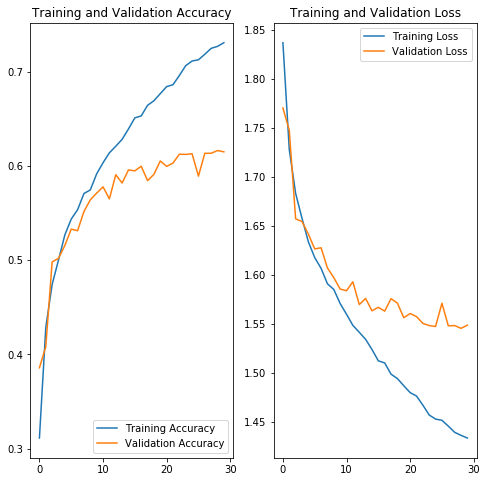

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
# Saving the model
model.save("emotion_detection_model.h5")